In [1]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import cv2
from PIL import Image
import os

In [2]:
# Getting current working directory to get back to this directory easily
cwd=os.getcwd()
images_path='C:\\Users\\ram_k\\Desktop\\Data\\'


In [3]:

# Specify transforms using torchvision.transforms as transforms
# library
transformations = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

## Transformations

#### Transforming the images to a 128x128 images to bring uniformity between all the pictures

In [4]:
train_set = datasets.ImageFolder(images_path, transform = transformations)

In [5]:
dataloader = torch.utils.data.DataLoader(train_set,
                                         batch_size= 32,
                                         shuffle=True)

In [6]:
dataloader

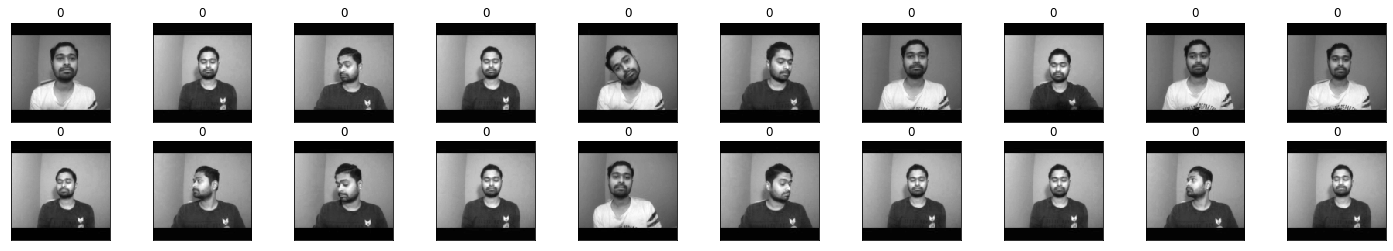

In [7]:
dataiter = iter(dataloader)
images, labels = dataiter.next()
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
plot_size=20
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    ax.imshow(images[idx][0], cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

In [8]:
def get_value(dictionary, this_key): 
    '''
    Gives the value of a inputed key
    dictionary: Dictionary from where the key has to be searched
    this_key: key for which value is required
    '''
    for key, value in dictionary.items(): 
         if this_key==key: 
            return value 
def get_key(dictionary, this_value): 
    '''
    Gives the key of a inputed value
    dictionary: Dictionary from where the key has to be searched
    this_value: value for which key is required
    '''
    for key, value in dictionary.items(): 
         if this_value == value: 
                return key
label_dict={0:'Closed', 1:'Open', 2:'Looking Away'}
label_map = dict((g, i) for i, g in label_dict.items())

In [9]:
# DataLoader
class MyDataset(Dataset):
    
    def __init__(self, images_path, transform=None):
        
        self.images_path = images_path
        self.transform = transform 
        self.labels=[]
        

        self.image_filenames = os.listdir(images_path+'\\1\\')

        for filename in self.image_filenames:
            label = filename.split('_')[0]
            if label =='closed':
                self.labels.append(0)
            elif label =='open':
                self.labels.append(1)
            else : self.labels.append(2)
        
        self.labels = np.array(list(map(lambda el:[el], self.labels)))

    def __getitem__(self, index):
        img = Image.open(os.path.join(self.images_path, self.image_filenames[index]))
        img = img.convert('RGB')
        if self.transform is not None:
            img = self.transform(img)
      
        label=self.labels[index]
        
        return img, label
    def __len__(self):
        return len(self.image_filenames)

In [10]:
train_transformations = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.RandomHorizontalFlip(128),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [11]:
train_dataset=MyDataset(images_path, transform=train_transformations)

In [12]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size= 32, shuffle=True)

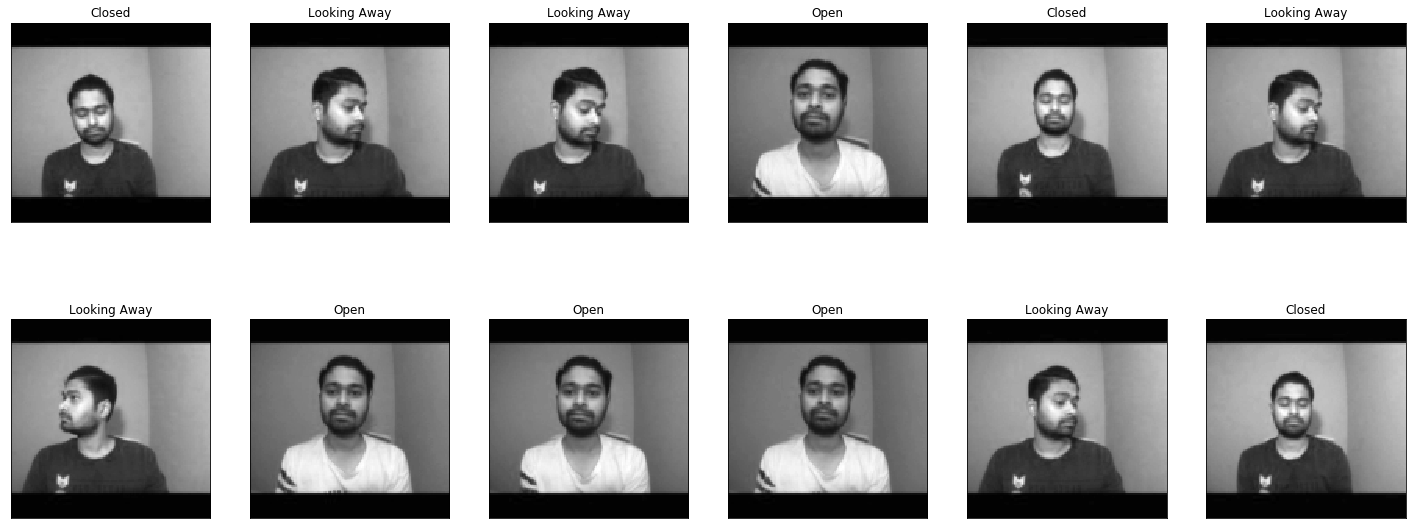

In [13]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 10))
plot_size=12
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    ax.imshow(images[idx][0], cmap='gray')
    ax.set_title(get_value(label_dict, labels[idx].item()))